https://data.world/prapull/terror-attacks-in-india

1.	I will work on “Terror Attacks in India” dataset which is available on data.world extracted from Global terror dataset.
2.	It has 9,940 rows and 16 columns with 1021.76 KB of size.
3.	Hypothesis:
a.	Weapons that caused most of the casualties
b.	To find if there is a trend in terror attacks based on the month.


In [1]:
#import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading a csv file stored in google drive

In [2]:
url = 'https://drive.google.com/file/d/1lxasU9xLTCaRNpFYml9BsZ9TDNuEvo9I/view?usp=sharing' 
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2) 

# https://stackoverflow.com/questions/56611698/pandas-how-to-read-csv-file-from-google-drive-public

In [3]:
df.head()

,Unnamed: 0,id,year,month,day,country,state,latitude,longitude,target,weapon,casualties,injuries,total
0,1185,1.972020e+11,1972,2,22,India,Delhi,28.632381,77.220004,Airports & Aircraft,Explosives/Bombs/Dynamite,0,0,0
1,2688,1.975010e+11,1975,1,2,India,Bihar,25.863042,85.781004,Government (General),Explosives/Bombs/Dynamite,4,0,4
2,3780,1.976050e+11,1976,5,26,India,Delhi,28.632381,77.220004,Airports & Aircraft,Explosives/Bombs/Dynamite,0,0,0
3,5251,1.977090e+11,1977,9,28,India,Maharashtra,19.075984,72.877656,Airports & Aircraft,Firearms,0,0,0
4,7261,1.979010e+11,1979,1,13,India,Assam,26.200605,92.937574,Police,Firearms,0,0,0


In [4]:
df.shape

(9940, 14)

In [5]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True) #drop columns term_date and suffix because most values are NaN

In [6]:
df.info() # .info() function gives information like datatype, shape, null, etc. of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          9940 non-null   float64
 1   year        9940 non-null   int64  
 2   month       9940 non-null   int64  
 3   day         9940 non-null   int64  
 4   country     9940 non-null   object 
 5   state       9940 non-null   object 
 6   latitude    9787 non-null   float64
 7   longitude   9787 non-null   float64
 8   target      9940 non-null   object 
 9   weapon      9940 non-null   object 
 10  casualties  9940 non-null   int64  
 11  injuries    9940 non-null   int64  
 12  total       9940 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 1009.7+ KB


Check for the nulls

In [7]:
df.isnull().sum()

id              0
year            0
month           0
day             0
country         0
state           0
latitude      153
longitude     153
target          0
weapon          0
casualties      0
injuries        0
total           0
dtype: int64

here we can not use *interpolation* or _sampling_ to fill missing values as this are geographical points which can't assigned based on previous records.

In [8]:
df.dropna(inplace = True)

In [9]:
df['state'].unique()

array(['Delhi', 'Bihar', 'Maharashtra', 'Assam', 'Manipur', 'Mizoram',
       'Andhra Pradesh', 'Jharkhand', 'Tamil Nadu', 'Uttar Pradesh',
       'West Bengal', 'Nagaland', 'Gujarat', 'Chandigarh', 'Rajasthan',
       'Punjab', 'Chhattisgarh', 'Tripura', 'Haryana',
       'Jammu and Kashmir', 'Himachal Pradesh', 'Karnataka',
       'Uttaranchal', 'Madhya Pradesh', 'Orissa', 'Kerala', 'Odisha',
       'Meghalaya', 'Sikkim', 'Goa', 'Andhra pradesh',
       'Arunachal Pradesh', 'Puducherry', 'Telangana', 'Malkangiri'],
      dtype=object)

remove duplicate values like Andhra Pradesh and Andhra pradesh

In [10]:
df['state'] = df['state'].str.capitalize() 

Top 5 states with hieghest number of attacks

In [11]:
df['state'].value_counts().head(5) 

Jammu and kashmir    1993
Assam                1061
Punjab                927
Manipur               883
Jharkhand             706
Name: state, dtype: int64

various weapons used for attacks and frequency

In [12]:
df['weapon'].value_counts()

Explosives/Bombs/Dynamite                                                      4138
Firearms                                                                       3804
Unknown                                                                         755
Incendiary                                                                      663
Melee                                                                           380
Sabotage Equipment                                                               27
Chemical                                                                         11
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)       6
Other                                                                             2
Fake Weapons                                                                      1
Name: weapon, dtype: int64

Most vulnerable places of terror

In [13]:
df['target'].value_counts().head()

Private Citizens & Property    2601
Police                         1830
Government (General)           1502
Business                        872
Transportation                  758
Name: target, dtype: int64

converting month number by month name and adding it to the dataframe

In [14]:
dmap = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['monthOfYr'] = df['month'].map(dmap)

total number of people affected i.e. casualities + injuries 

In [15]:
byMonth = df.groupby('monthOfYr').count()
byMonth

,id,year,month,day,country,state,latitude,longitude,target,weapon,casualties,injuries,total
monthOfYr,,,,,,,,,,,,,
Apr,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023,1023
Aug,958,958,958,958,958,958,958,958,958,958,958,958,958
Dec,657,657,657,657,657,657,657,657,657,657,657,657,657
Feb,653,653,653,653,653,653,653,653,653,653,653,653,653
Jan,789,789,789,789,789,789,789,789,789,789,789,789,789
Jul,887,887,887,887,887,887,887,887,887,887,887,887,887
Jun,833,833,833,833,833,833,833,833,833,833,833,833,833
Mar,693,693,693,693,693,693,693,693,693,693,693,693,693
May,970,970,970,970,970,970,970,970,970,970,970,970,970


Total affected people in different months

<AxesSubplot:xlabel='monthOfYr'>

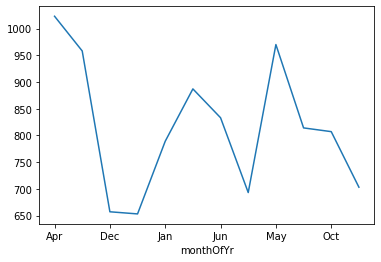

In [16]:
byMonth['total'].plot()

most frequent weapons used in different months 

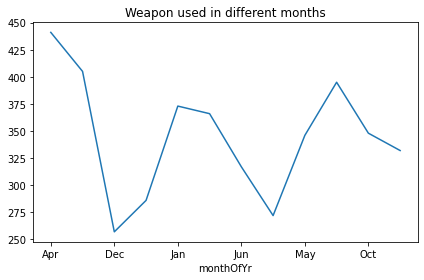

In [17]:
df[df['weapon']=='Explosives/Bombs/Dynamite'].groupby('monthOfYr').count()['total'].plot()
plt.title('Weapon used in different months')
plt.tight_layout()

Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites

In [18]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline() # For offline use

Interactive plot of states with toal affected people over the years.

In [19]:
df.iplot(kind='bar',x='state',y='total',title = 'states with total afffected', xTitle = 'state', yTitle='count')

Terrorist Activities by Year

C:\Users\Dishant\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



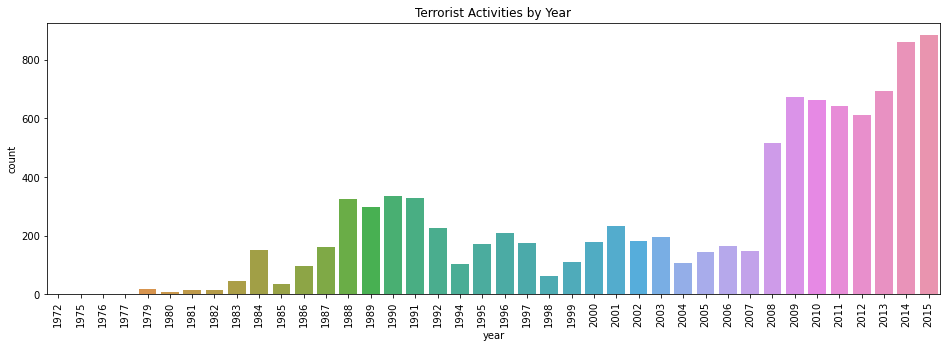

In [20]:
plt.subplots(figsize=(16,5))
sns.countplot('year',data=df)
plt.xticks(rotation=90) # to rotate the xPoints by 90 degrees
plt.title('Terrorist Activities by Year')
plt.show()

Terrorist Activities in different states

Text(0.5, 1.0, 'Terrorist Activities in different states')

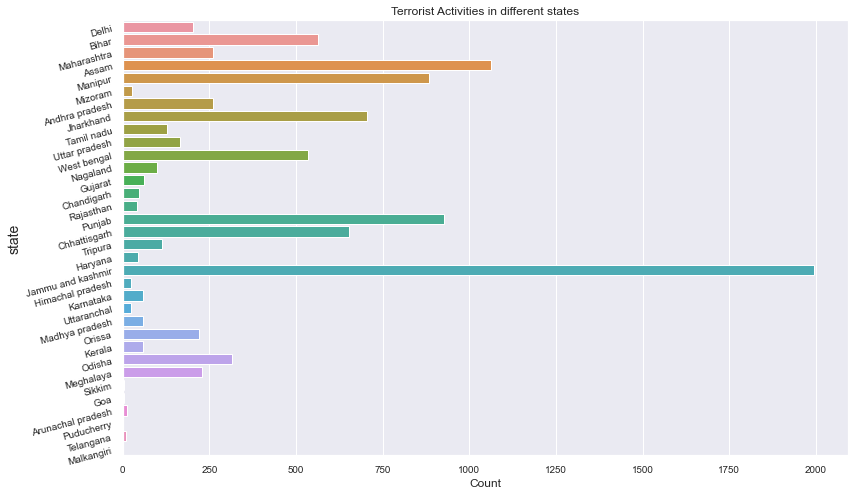

In [21]:
fig = plt.figure(figsize=(13, 8))
sns.set(font_scale=0.9) #for axis points fontsize
year = sns.countplot(y='state', data=df)
year.set_yticklabels(year.get_yticklabels(), rotation=15)
plt.ylabel('state', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.title('Terrorist Activities in different states', fontsize=12)

Converting different years into decades using cut function of pandas

In [22]:
df['decade'] = pd.cut(df['year'], bins=[1970, 1980, 1990, 2000, 2010, 2020], 
               labels=['1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020'])
df.head(3)

,id,year,month,day,country,state,latitude,longitude,target,weapon,casualties,injuries,total,monthOfYr,decade
0,1.972020e+11,1972,2,22,India,Delhi,28.632381,77.220004,Airports & Aircraft,Explosives/Bombs/Dynamite,0,0,0,Feb,1970-1980
1,1.975010e+11,1975,1,2,India,Bihar,25.863042,85.781004,Government (General),Explosives/Bombs/Dynamite,4,0,4,Jan,1970-1980
2,1.976050e+11,1976,5,26,India,Delhi,28.632381,77.220004,Airports & Aircraft,Explosives/Bombs/Dynamite,0,0,0,May,1970-1980


The pandas crosstab function builds a cross-tabulation table that can show the frequency with which certain groups of data appear. https://pbpython.com/pandas-crosstab.html

In [23]:
stateDecade = pd.crosstab(df.decade, df.state,)
stateDecade.head(6)

state,Andhra pradesh,Arunachal pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Delhi,Goa,Gujarat,Haryana,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil nadu,Telangana,Tripura,Uttar pradesh,Uttaranchal,West bengal
decade,,,,,,,,,,,,,,,,,,,,,
1970-1980,1,0,5,2,0,0,5,0,0,0,...,0,0,0,0,2,0,0,2,0,1
1980-1990,19,0,85,13,35,4,87,0,11,26,...,0,688,21,0,11,0,12,39,15,74
1990-2000,64,0,196,53,11,6,74,2,6,11,...,0,217,13,4,47,0,40,53,5,20
2000-2010,97,3,411,219,0,195,28,1,42,3,...,0,8,3,0,8,0,38,20,2,301
2010-2020,80,9,364,275,1,449,9,2,3,3,...,1,14,4,0,60,9,23,52,1,137


Terrorist attacks decade vise

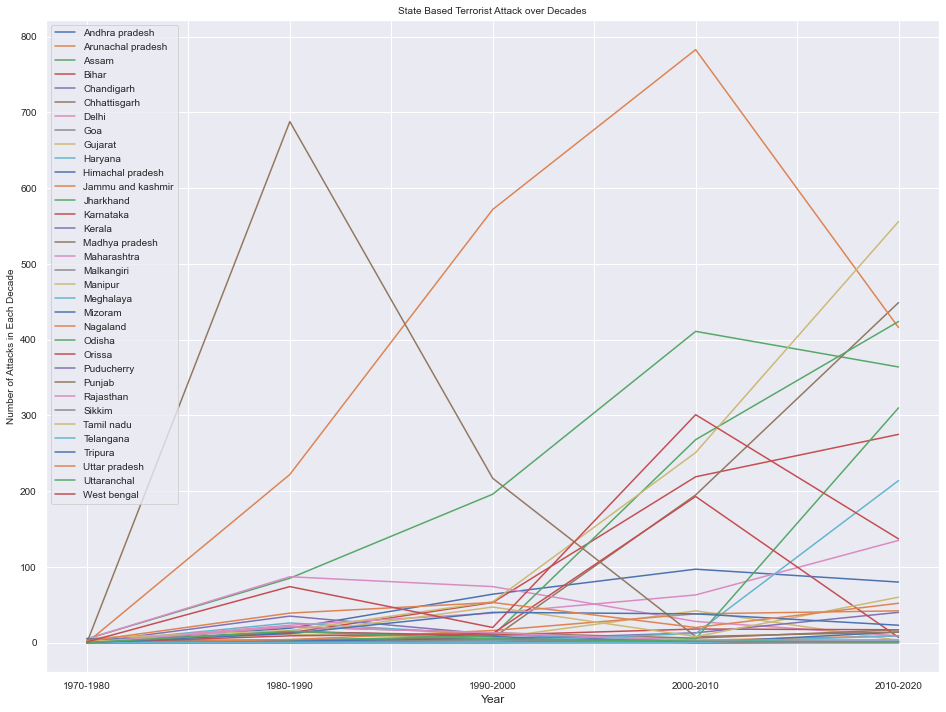

In [24]:
stateDecade.plot(figsize=(16, 12), fontsize=10)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Attacks in Each Decade', fontsize=10)
plt.title('State Based Terrorist Attack over Decades', fontsize=10)
plt.legend(fontsize=10)

Jointplot is seaborn library used to visualize and analyze the relationship between two variables and describe their individual distributions on the same plot. https://www.geeksforgeeks.org/python-seaborn-jointplot-method/

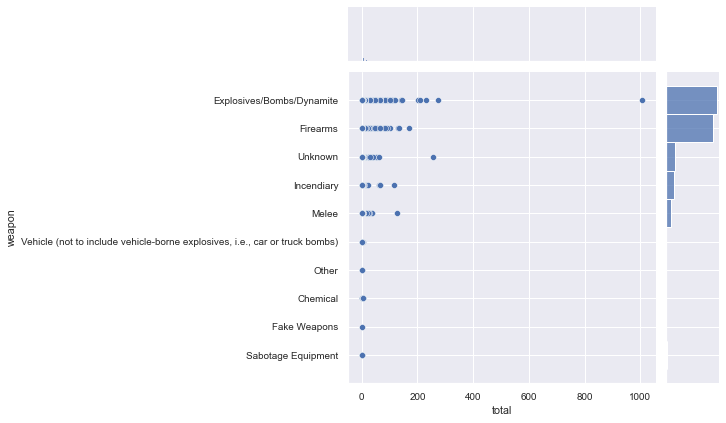

In [25]:
sns.jointplot(y='weapon',x='total',data=df, height = 6, space = 0.2)